# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Importing the dataset

In [2]:
df_orders = pd.read_csv("data_orders.csv")

In [3]:
df_orders

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0


In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


In [5]:
df_orders.shape

(10716, 8)

In [6]:
df_orders.size

85728

In [7]:
df_orders.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
count,10716.000000,10716.000000,2814.000000,1.071600e+04,10716.000000,10716.000000,7307.000000
mean,-0.964323,51.450541,441.415423,3.000598e+12,5.590612,0.262598,157.892021
std,0.022818,0.011984,288.006379,2.396261e+07,2.328845,0.440066,213.366963
min,-1.066957,51.399323,60.000000,3.000550e+12,4.000000,0.000000,3.000000
25%,-0.974363,51.444643,233.000000,3.000583e+12,4.000000,0.000000,45.000000
50%,-0.966386,51.451972,368.500000,3.000595e+12,4.000000,0.000000,98.000000
75%,-0.949605,51.456725,653.000000,3.000623e+12,9.000000,1.000000,187.500000
max,-0.867088,51.496169,1559.000000,3.000633e+12,9.000000,1.000000,4303.000000


In [8]:
#converting column to datetime datatype
df_orders['order_datetime'] = pd.to_datetime(df_orders['order_datetime'])

In [9]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_datetime                 10716 non-null  datetime64[ns]
 1   origin_longitude               10716 non-null  float64       
 2   origin_latitude                10716 non-null  float64       
 3   m_order_eta                    2814 non-null   float64       
 4   order_gk                       10716 non-null  int64         
 5   order_status_key               10716 non-null  int64         
 6   is_driver_assigned_key         10716 non-null  int64         
 7   cancellations_time_in_seconds  7307 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 669.9 KB


In [10]:
#null value percentage
(df_orders.isnull().sum()/df_orders.shape[0])*100

order_datetime                    0.000000
origin_longitude                  0.000000
origin_latitude                   0.000000
m_order_eta                      73.740202
order_gk                          0.000000
order_status_key                  0.000000
is_driver_assigned_key            0.000000
cancellations_time_in_seconds    31.812243
dtype: float64

**Here, Based on these percentages, it appears that 'm_order_eta' and 'cancellations_time_in_seconds' have a considerable number of missing values. This insight can guide further data cleaning processes to handle these null values appropriately.**

# Importing another dataset

In [11]:
df_offers = pd.read_csv("data_offers.csv")

In [12]:
df_offers

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196
...,...,...
334358,3000552921666,300050611632
334359,3000593796526,300051443024
334360,3000590955748,300051340498
334361,3000557510943,300050772593


In [13]:
df_offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334363 entries, 0 to 334362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   order_gk  334363 non-null  int64
 1   offer_id  334363 non-null  int64
dtypes: int64(2)
memory usage: 5.1 MB


In [14]:
df_offers.shape

(334363, 2)

In [15]:
df_offers.size

668726

In [16]:
df_offers.isnull().sum()

order_gk    0
offer_id    0
dtype: int64

## Merging the dataset

In [17]:
df = df_orders.merge(df_offers, how='inner',on='order_gk')

In [18]:
df

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,2024-04-14 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,2024-04-14 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,2024-04-14 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,2024-04-14 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,2024-04-14 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275
...,...,...,...,...,...,...,...,...,...
31263,2024-04-14 12:44:11,-0.975372,51.457846,NaN,3000597886155,4,0,43.0,300051590196
31264,2024-04-14 12:42:52,-0.975372,51.457846,NaN,3000597886140,4,0,44.0,300051590176
31265,2024-04-14 13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,300051648809
31266,2024-04-14 13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,300051648910


In [19]:
def assigned(row):
    x = row['is_driver_assigned_key']
    if x==1:
        return "Yes"
    else:
        return "No"
    
df['is_driver_assigned_key'] = df.apply(assigned,axis=1)

order_status_key - status, an enumeration consisting of the following mapping:
* 4 - cancelled by client,
* 9 - cancelled by system, i.e., a reject

In [20]:
def assign(row):
    x = row['order_status_key']
    if x==4:
        return "Client_Cancellation"
    else:
        return "System_Cancellation"
    
df['order_status_key'] = df.apply(assign,axis=1)

# EDA

## Question 1

#### Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

In [21]:
cancellation = df.groupby(['is_driver_assigned_key','order_status_key'])['offer_id'].count().to_frame().reset_index().rename(
    columns={'index':'','is_driver_assigned_key':'driver_assigned','order_status_key':'order_status','offer_id':'count'})

In [22]:
cancellation

,driver_assigned,order_status,count
0,No,Client_Cancellation,13435
1,No,System_Cancellation,9469
2,Yes,Client_Cancellation,8360
3,Yes,System_Cancellation,4


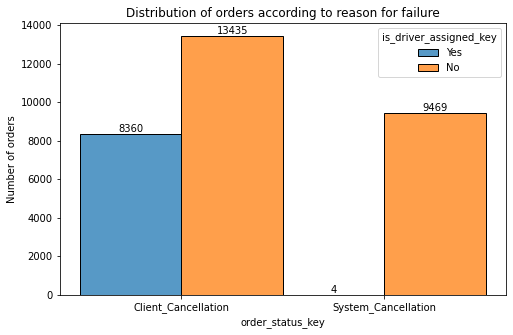

In [23]:
plt.figure(figsize=(8,5))
ax = sns.histplot(binwidth=1,
            x=df['order_status_key'],
            hue=df['is_driver_assigned_key'],
            data=df,
            stat="count",
            multiple="dodge")
ax.bar_label(container = ax.containers[0])
ax.bar_label(container = ax.containers[1])

plt.title('Distribution of orders according to reason for failure')
plt.ylabel('Number of orders')

plt.show()

The cancellation data provides an overview of cancellation patterns based on whether a driver was assigned to the order. It appears that there are more cancellations when no driver is assigned compared to when a driver is assigned.
Even without a driver assigned, there were 13,435 cancellations initiated by clients. Here are some potential reasons for client cancellations even when no driver is assigned:
* **Long Waiting Times:** Customers might cancel their orders if they perceive that the waiting time for a driver assignment is too long. This could be due to various factors such as high demand, insufficient number of available drivers, or delays in the process.
* **Technical Glitches:** Technical issues within the system might result in delays or failures in assigning drivers to orders.
* **Competing Services:** Customers might find alternative transportation options or services more appealing while waiting for driver assignment, prompting them to cancel their current order.

## Question 2

#### Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

In [24]:
df['hour']=df.order_datetime.dt.hour

In [25]:
df.hour.value_counts()

8     3865
21    2782
23    2471
22    2029
0     1993
7     1566
17    1540
2     1475
15    1444
3     1418
20    1381
1     1305
9     1258
18    1136
13    1072
16     832
14     733
12     697
19     644
11     510
6      392
10     387
4      227
5      111
Name: hour, dtype: int64

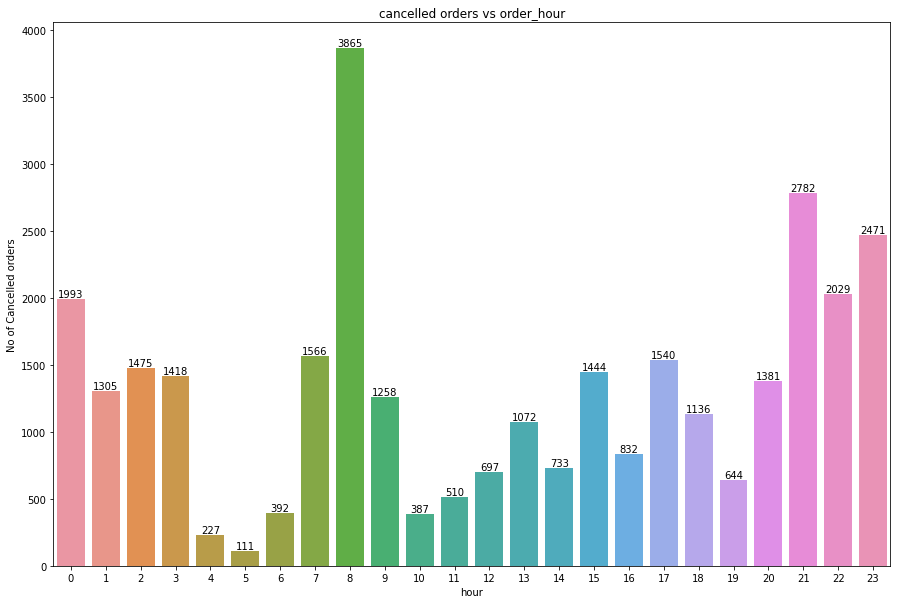

In [65]:
plt.figure(figsize=(15,10))

ax=sns.countplot(data=df, x=df['hour'])
ax.bar_label(container = ax.containers[0])

plt.title("cancelled orders vs order_hour")
plt.ylabel("No of Cancelled orders")
plt.show()

* Hours 8, 21, 23, and 22 have the highest counts of cancellations, indicating potential peaks in cancellation activity during these hours.
* These hours might correspond to specific times of the day when there are higher volumes of orders.

In [27]:
status = df.groupby(['hour','order_status_key','is_driver_assigned_key'])['offer_id'].count().to_frame().reset_index()

In [28]:
status

,hour,order_status_key,is_driver_assigned_key,offer_id
0,0,Client_Cancellation,No,957
1,0,Client_Cancellation,Yes,326
2,0,System_Cancellation,No,706
3,0,System_Cancellation,Yes,4
4,1,Client_Cancellation,No,633
...,...,...,...,...
68,22,Client_Cancellation,Yes,415
69,22,System_Cancellation,No,660
70,23,Client_Cancellation,No,1144
71,23,Client_Cancellation,Yes,444


<function matplotlib.pyplot.show(close=None, block=None)>

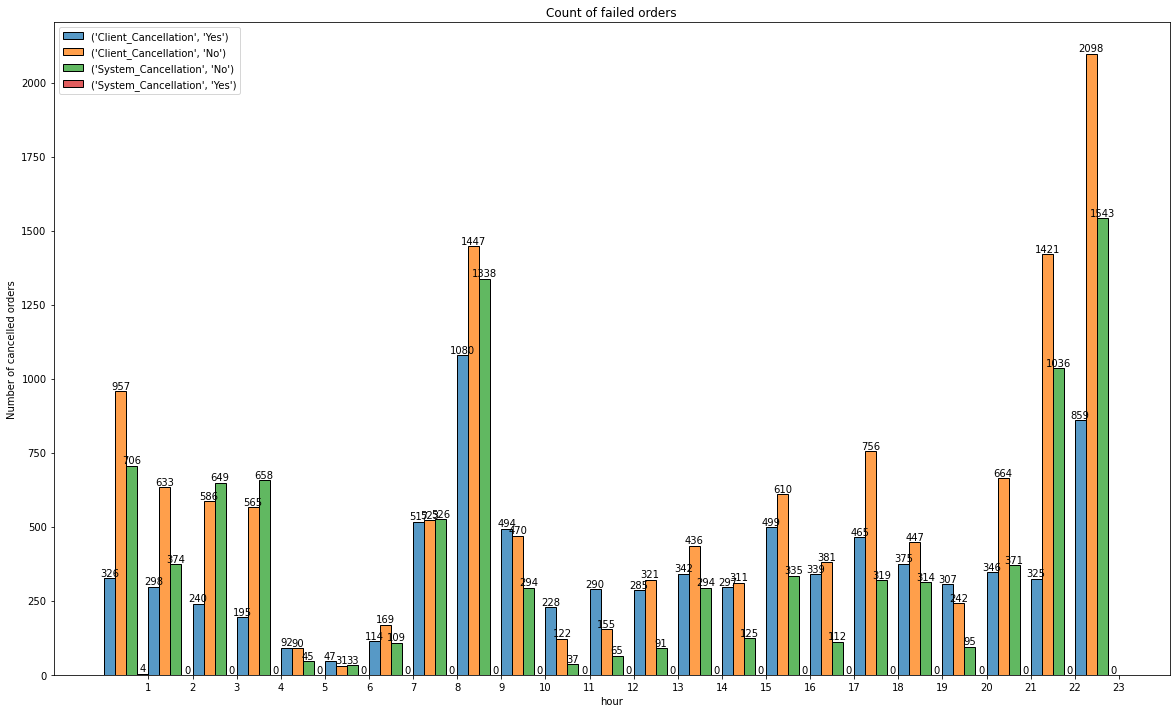

In [29]:
plt.figure(figsize=(20,12))
ax=sns.histplot(binwidth=1,
                x='hour',
                hue=df[['order_status_key','is_driver_assigned_key']].apply(tuple, axis=1),
                 data=df,
                 stat='count',
                 multiple='dodge')

ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
ax.bar_label(container=ax.containers[2])
ax.bar_label(container=ax.containers[3])
#to show all x-axis values
ax.set_xticks(np.arange(1,24,1)) 
plt.title("Count of failed orders")
plt.ylabel("Number of cancelled orders")
plt.show

The highest cancellation count across all categories occurred at 8:00

## Question 3

#### Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

In [30]:
avg_time = df.groupby(['hour','is_driver_assigned_key'])['cancellations_time_in_seconds'].mean().to_frame().reset_index()

In [31]:
avg_time = avg_time.rename(columns={'hour':'hour','is_driver_assigned_key':'driver_assigned','cancellations_time_in_seconds':'avg_time_in_seconds'})

In [32]:
avg_time

,hour,driver_assigned,avg_time_in_seconds
0,0,No,115.126437
1,0,Yes,276.082822
2,1,No,100.593997
3,1,Yes,296.312081
4,2,No,121.305461
5,2,Yes,301.466667
6,3,No,129.182301
7,3,Yes,368.682051
8,4,No,100.733333
9,4,Yes,245.250000


In [33]:
avg_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hour                 48 non-null     int64  
 1   driver_assigned      48 non-null     object 
 2   avg_time_in_seconds  48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [34]:
avg_time['avg_time_in_seconds'] = round(avg_time['avg_time_in_seconds'], 0)

<function matplotlib.pyplot.show(close=None, block=None)>

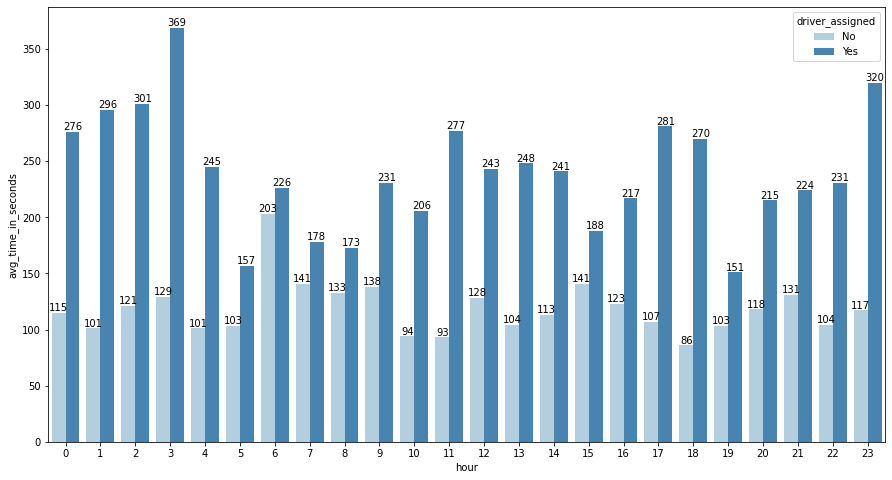

In [35]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x = 'hour',
            y = 'avg_time_in_seconds',
            hue = 'driver_assigned',
            data = avg_time,
            palette = "Blues")

ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
plt.show

##### On average, the time to cancellation is consistently longer when a driver is assigned compared to when there is no assigned driver, across all hours. The peak occurs at 3:00, suggesting a significant number of client cancellations during this hour.

## Question 4

#### Plot the distribution of average ETA by hours. How can this plot be explained?

In [61]:
avg_eta = df.groupby(["hour"])["m_order_eta"].mean().to_frame().reset_index()

In [62]:
avg_eta['m_order_eta']= round(avg_eta['m_order_eta'],1)

In [63]:
avg_eta

,hour,m_order_eta
0,0,375.4
1,1,355.3
2,2,389.6
3,3,381.5
4,4,266.1
5,5,476.8
6,6,489.5
7,7,642.7
8,8,671.1
9,9,556.1


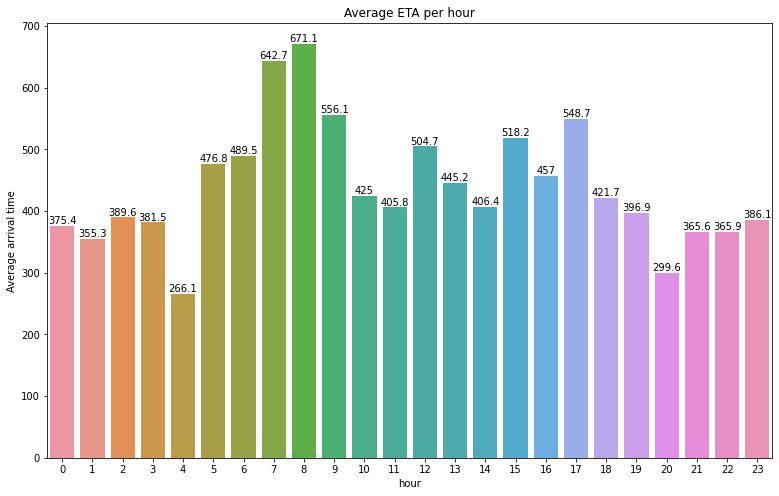

In [64]:
plt.figure(figsize=(13,8))
ax= sns.barplot(x='hour',
            y='m_order_eta',
            data=avg_eta)

ax.bar_label(container=ax.containers[0])

plt.title('Average ETA per hour')
plt.ylabel('Average arrival time')
plt.show()

**The average waiting time for clients increases, the number of failed orders also increases.
In comparison with the previous graph illustrating "cancelled orders vs order_hour," the highest count of cancellations is occured at 8:00. During this time, clients likely experienced extended waiting periods for drivers.**